In [55]:
from modsim import *
%matplotlib notebook

http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [56]:
kg= UNITS.kg
m= UNITS.m
N= UNITS.N
W= UNITS.W
K= UNITS.K
j= UNITS.joules
s= UNITS.seconds
degrees= UNITS.degrees


In [57]:
mass_sun= 1.989e30 
G= 6.673e-11
mass_toast= .05
S_B_const= 5.67e-8
temp_S= 5772 
area_t= .01 
r_s= 695770 *1000 
Pow_s= 3.9e26 
Q_b= .008/273 

power_sun = S_B_const * temp_S *4 *pi *r_s**2 
 

num_G = G* mass_sun *mass_toast   

num_G


 

#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

6.6362985e+18

In [58]:

condition= Condition(x0= 1e100, y0= 0, velocity= 50000, angle = 40, duration= 1e100, T0= 0 )

In [59]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    vx, vy = pol2cart(theta, velocity)
    
    init= State(x=x0, y=y0, vx= vx, vy= vy)
    area_toast = area_t 
    
    ts= linspace(0, duration, 1000)
    
    return System(init= init, mass= mass_toast, area_t= area_t, T= T0, Q_b= Q_b, ts= ts)

system= make_system(condition)



In [60]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    
    unpack(system)
    P= Vector(x, y) 
    V= Vector(vx, vy) 
    Tangent_dir= Vector(x, -y) 
    w= V.proj(Tangent_dir) * Tangent_dir.hat() 

    F_grav= num_G / P.mag **2 * P.hat() 
    F_cent= w**2  *mass_toast / P.mag  * Tangent_dir.hat()
    
   
    
    a_grav= (F_grav/mass_toast) * P.hat() 
    a_cent= (F_cent/mass_toast) *Tangent_dir.hat() 
    
    
    ax= a_grav[0] + a_cent[0]
    ay= a_grav[1] + a_cent[1]
    
    a= Vector(ax, ay)

    
    
    rad_on_toast= t * Pow_s * r_s**2/ P.mag**2 
    temp_toast= rad_on_toast/ Q_b / mass_toast 
    
    
    return vx, vy, a.x, a.y
    
    
    
slope_func(system.init,1,system)
    

(38302.222155948897,
 32139.380484326961,
 <Quantity(1.4670602220836628e+109, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>)

In [61]:


run_odeint(system, slope_func)

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [62]:
system.results.head

<bound method NDFrame.head of                            x              y             vx             vy
0.000000e+00   1.000000e+100   0.000000e+00   3.830222e+04   3.213938e+04
1.001001e+97   1.000000e+100  8.390995e-101   2.839998e+13   3.213938e+04
2.002002e+97  -4.380679e-308 -5.423764e-308 -6.536318e-308 -7.648872e-308
3.003003e+97  -8.761426e-308 -1.084766e-307 -1.307277e-307 -1.529788e-307
4.004004e+97  -1.752299e-307 -2.169560e-307 -2.614581e-307 -3.059603e-307
5.005005e+97  -3.504625e-307 -4.339174e-307 -5.229217e-307 -6.119260e-307
6.006006e+97  -7.009304e-307 -8.678457e-307 -1.045854e-306 -1.223863e-306
7.007007e+97  -1.401872e-306 -1.735713e-306 -2.091730e-306 -2.447748e-306
8.008008e+97  -2.803765e-306 -3.471470e-306 -4.183504e-306 -4.895539e-306
9.009009e+97  -5.607573e-306 -6.943026e-306 -8.367095e-306 -9.791164e-306
1.001001e+98  -1.121523e-305 -1.388623e-305 -1.673436e-305 -1.958250e-305
1.101101e+98  -2.243064e-305 -2.777280e-305 -3.346908e-305 -3.916535e-305
1.201201

<IPython.core.display.Javascript object>


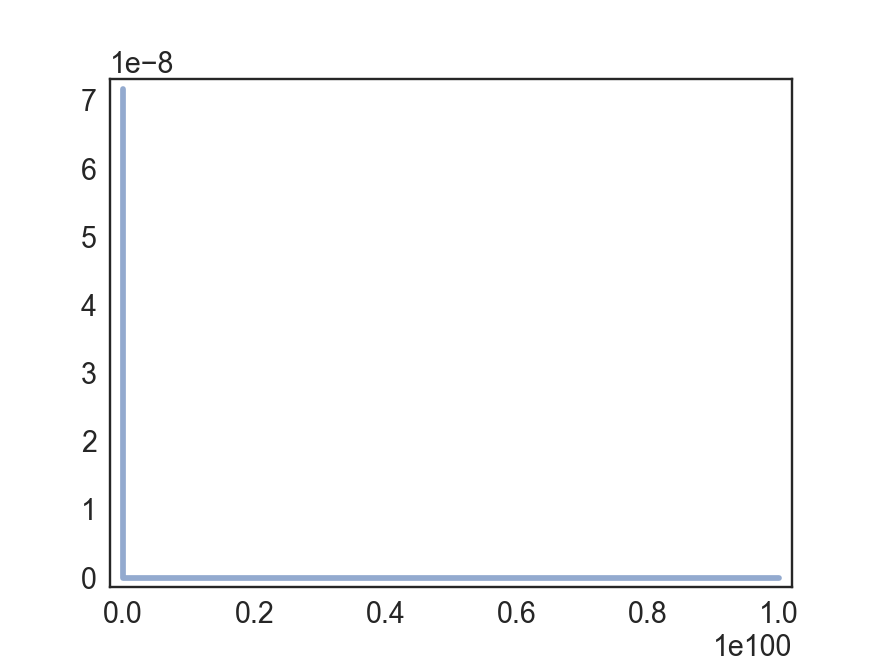

In [63]:
plot(system.results.x, system.results.y)

In [64]:
A= Vector(2, -1) *m

B= Vector(0, 5)

A.proj(B)

C= 12*A.hat()


print(type(A), type(A.x))
A.hat()

<class 'modsim._Vector'> <class 'modsim._Vector'>


<Quantity([ 0.89442719 -0.4472136 ], 'dimensionless')>